## Data exploration

In [33]:
%load_ext autoreload
%autoreload 2
%load_ext autotime

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../src')

from data_processing.mtb_data_provider import MtbDataProvider

RAW_FILE = 'mspuebung'
FREQUENCY = 80

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.62 ms


### Read data

In [34]:
acc_data = pd.read_csv('../data/raw/' + RAW_FILE + '.csv')
acc_data.head()

,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1557745132645,2019-05-13T12:58:52.645,0.00,0.886,0.103,-0.114
1,1557745132725,2019-05-13T12:58:52.725,0.08,0.893,0.104,-0.113
2,1557745132805,2019-05-13T12:58:52.805,0.16,0.891,0.102,-0.112
3,1557745132885,2019-05-13T12:58:52.885,0.24,0.893,0.104,-0.111
4,1557745132965,2019-05-13T12:58:52.965,0.32,0.894,0.099,-0.108


time: 22.3 ms


In [35]:
acc_data_labels = pd.read_csv('../data/raw/' + RAW_FILE + '_labels.csv')
acc_data_labels.head()

,start,end,difficulty
0,0,136,2
1,137,240,0
2,241,270,1
3,272,640,0


time: 6.94 ms


(8166, 6)


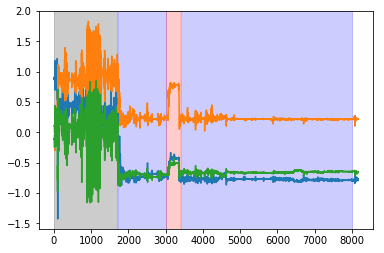

time: 182 ms


In [36]:
plt.plot(acc_data["x-axis (g)"])
plt.plot(acc_data["y-axis (g)"])
plt.plot(acc_data["z-axis (g)"])

print(acc_data.shape)

for index, label_row in acc_data_labels.iterrows():
    difficulty = label_row["difficulty"]
    
    if (difficulty == 0):
        color = 'blue'
    elif (difficulty == 1):
        color = 'red'
    elif (difficulty == 2):
        color = 'black'
    
    plt.axvspan((label_row["start"] * 1000)/80, (label_row["end"] * 1000)/80, color=color, alpha=0.2)

plt.show()

### Prepare data

In [41]:
acc_data, acc_labels = MtbDataProvider.load_data('../data/raw/' + RAW_FILE + '.csv', frequency=FREQUENCY)
print(acc_data.shape, acc_labels.shape)

(8166, 5) (4, 3)
time: 22.8 ms


In [42]:
X_train, y_train = MtbDataProvider.slice_data(acc_data, acc_labels, window_size=2000, frequency=80)
print(X_train.shape, y_train.shape)

(681, 25, 3) (681,)
time: 6.17 ms


In [76]:
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


time: 1.79 ms


In [122]:
fs = 8000.0
lowcut = 550.0
highcut = 600.0
y = butter_bandpass_filter(X_train, lowcut, highcut, fs, order=6)

time: 5.5 ms


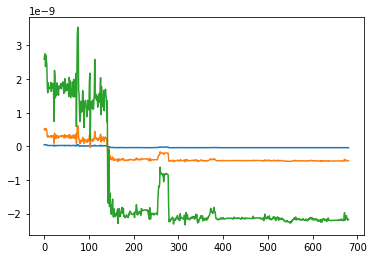

time: 135 ms


In [123]:
plt.plot(y[:, -1])
plt.show()

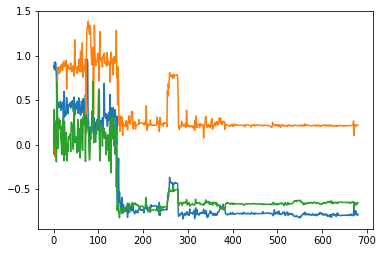

time: 137 ms


In [93]:
plt.plot(X_train[:, -1])
plt.show()